In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from util.TrainRoutine import AutoEncTrainRoutine
from util.Evaluator import Evaluator


/home/user1-asd-arch/.local/share/virtualenvs/code-b8C0A6mP/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


We are setting up the Autoencoder for anomaly detection. It uses the original data set for training a baseline model. We test different embedding dimensions

In [2]:
emd_dims = [8, 16, 32, 64, 128, 256]

In [3]:
vanilla_ae = AutoEncTrainRoutine()

------------------------------
Initialising Autoencoder with:
RecurrentAutoencoder(
  (encoder): Encoder(
    (rnn1): LSTM(1, 64, batch_first=True)
    (rnn2): LSTM(64, 32, batch_first=True)
  )
  (decoder): Decoder(
    (rnn1): LSTM(32, 32, batch_first=True)
    (rnn2): LSTM(32, 64, batch_first=True)
    (output_layer): Linear(in_features=64, out_features=1, bias=True)
  )
)
Training on cuda
------------------------------


This is how a regular heartbeat from the training data looks like:

['N']

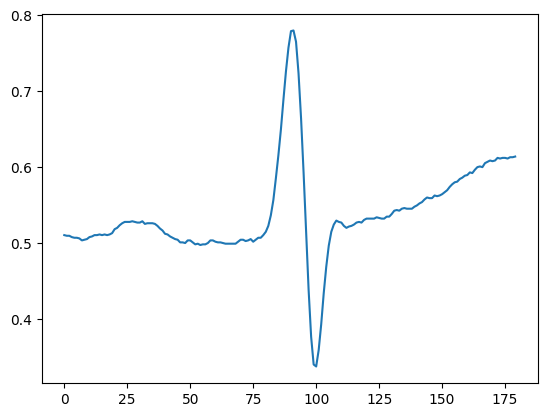

In [4]:
plt.plot(vanilla_ae.train_ds.df[0])
vanilla_ae.train_ds.y[0]

This is how an anomalous heartbeat looks like:

['A']

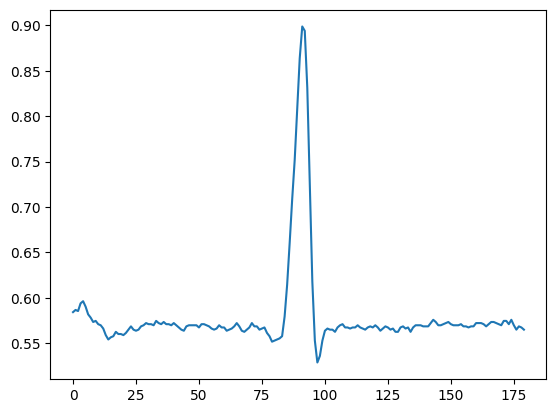

In [5]:
plt.plot(vanilla_ae.test_anomalie_ds.df[1])
vanilla_ae.test_anomalie_ds.y[1]

We will now train the baseline model using only regular heartbeats.

In [7]:
model, history = vanilla_ae.train_model()

loss: 64.088821  [    1/71253]
loss: 3.895845  [10001/71253]
loss: 5.781144  [20001/71253]
loss: 3.194945  [30001/71253]
loss: 2.728837  [40001/71253]
loss: 5.132485  [50001/71253]
loss: 8.051697  [60001/71253]
loss: 4.797532  [70001/71253]
Epoch 1: train loss = 5.005929052064325, val loss = 3.5813273332371316
loss: 2.828594  [    1/71253]
loss: 2.990269  [10001/71253]
loss: 3.057047  [20001/71253]
loss: 4.691478  [30001/71253]
loss: 2.579763  [40001/71253]
loss: 6.244007  [50001/71253]
loss: 3.599901  [60001/71253]
loss: 2.136139  [70001/71253]
Epoch 2: train loss = 3.2540077293348966, val loss = 2.5503210014813957
loss: 7.134461  [    1/71253]
loss: 1.621739  [10001/71253]
loss: 3.220851  [20001/71253]
loss: 2.521517  [30001/71253]
loss: 2.275330  [40001/71253]
loss: 5.919739  [50001/71253]
loss: 1.384264  [60001/71253]
loss: 2.087430  [70001/71253]
Epoch 3: train loss = 2.508908673397521, val loss = 2.1802968811540175
loss: 2.455212  [    1/71253]
loss: 3.408941  [10001/71253]
loss:

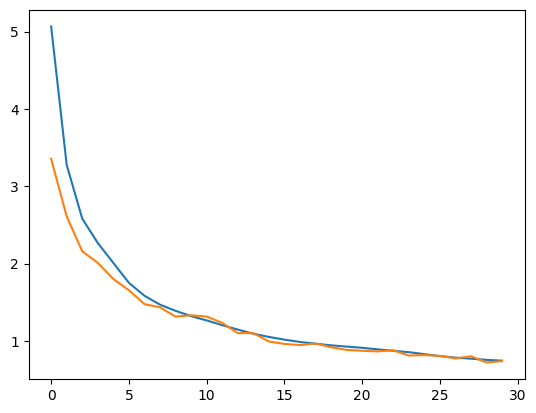

In [15]:
plt.plot(history["train"])
plt.plot(history["val"])

In [16]:
vanilla_ae.save_model("vanilla_ae_embed32.pth")

In [8]:
vanilla_ae.load_model("lstmae_180_embed32.pth")

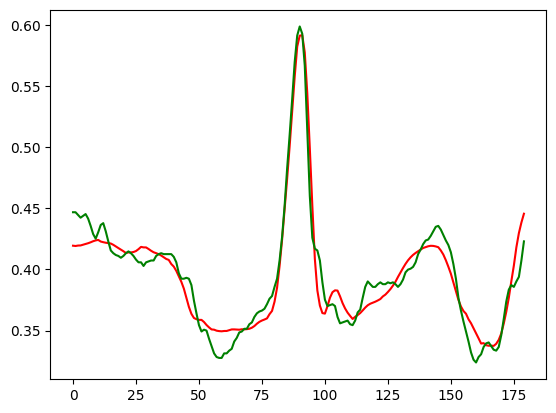

In [12]:
plt.plot(model(test_normal_ds.__getitem__(1)[0]).cpu().detach().numpy().squeeze(), color="red")
plt.plot(test_normal_ds.__getitem__(1)[0].cpu().detach().numpy().squeeze(), color="green")

In [9]:
evaluator = Evaluator(vanilla_ae.test_normal_ds, vanilla_ae.test_anomalie_ds, vanilla_ae.model)

/home/user1-asd-arch/.local/share/virtualenvs/code-b8C0A6mP/lib/python3.7/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([180, 1])) that is different to the input size (torch.Size([1, 180, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


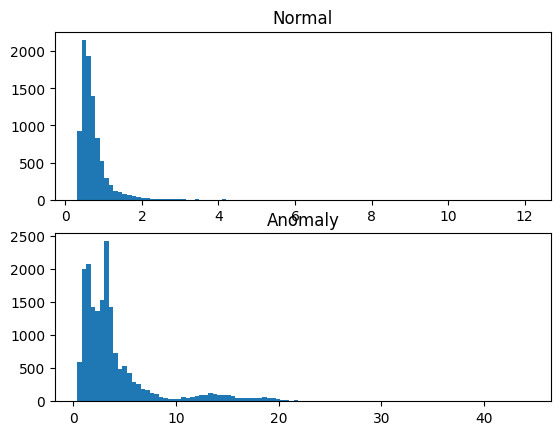

In [10]:
plt.figure()

plt.subplot(2,1,1)
plt.hist(evaluator.loss_normal, bins=100)
plt.title("Normal")

plt.subplot(2,1,2)
plt.hist(evaluator.loss_anomaly, bins=100)
plt.title("Anomaly")

plt.show()

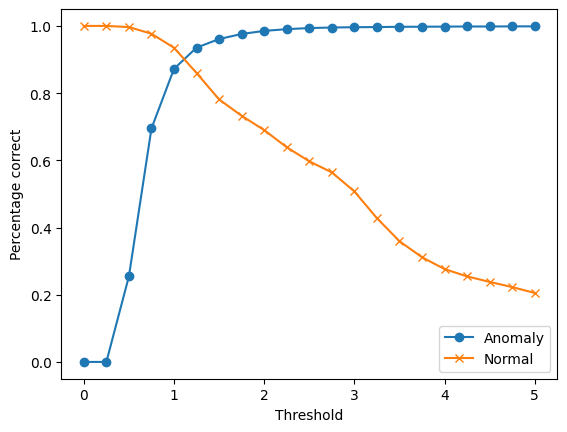

In [11]:
corr_normal, corr_anomaly = evaluator.find_threshold()
plt.plot(np.linspace(0,5,21), corr_normal, marker="o")
plt.plot(np.linspace(0,5,21), corr_anomaly, marker="x")
plt.xlabel("Threshold")
plt.ylabel("Percentage correct")
plt.legend(["Anomaly", "Normal"])
plt.show()

In [13]:
predictions_normal, predictions_anomaly = evaluator.predict_class(1.25)
evaluator.evaluate(predictions_normal, predictions_anomaly)

Acc: 0.8845996199277117
Precision: 0.7649683897359614
Recall: 0.9353188587018302
F1: 0.8416099831227944
